# Work Status Classification (Private vs. Public vs. No Income)

In [82]:
# import packages
import sklearn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(16)

In [83]:
# load data
csv_file = "~/IDC5210_Machine_Learning/Project/Translated_data/demos_w_state_trans.csv"
demo_df = pd.read_csv(csv_file)
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103202 entries, 0 to 103201
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               103202 non-null  int64  
 1   Cust_ID                  103202 non-null  int64  
 2   Cust_Segment             103202 non-null  object 
 3   Branch_ID                103202 non-null  int64  
 4   Gender                   103202 non-null  object 
 5   Marital_Status           103202 non-null  object 
 6   Education_Lv             103202 non-null  object 
 7   Job_Status               103202 non-null  object 
 8   Income                   100752 non-null  float64
 9   Age                      103202 non-null  int64  
 10  Years_w_Bank             103197 non-null  float64
 11  Work_Region              103202 non-null  object 
 12  Home_Region              103198 non-null  object 
 13  Branch_Region            103198 non-null  object 
 14  1)RI

In [84]:
# drop unnecessary columns
demo_df.drop(["Unnamed: 0"], axis = 1, inplace=True)
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103202 entries, 0 to 103201
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Cust_ID                  103202 non-null  int64  
 1   Cust_Segment             103202 non-null  object 
 2   Branch_ID                103202 non-null  int64  
 3   Gender                   103202 non-null  object 
 4   Marital_Status           103202 non-null  object 
 5   Education_Lv             103202 non-null  object 
 6   Job_Status               103202 non-null  object 
 7   Income                   100752 non-null  float64
 8   Age                      103202 non-null  int64  
 9   Years_w_Bank             103197 non-null  float64
 10  Work_Region              103202 non-null  object 
 11  Home_Region              103198 non-null  object 
 12  Branch_Region            103198 non-null  object 
 13  1)RISKSIZ                103202 non-null  float64
 14  2)GE

In [85]:
# # count risk types per row
# risk_counts = demo_df.iloc[:,10:22].apply(pd.Series.value_counts, axis=1)
# risk_counts = risk_counts.fillna(0)

In [86]:
# risk_counts

In [87]:
# demo_df = demo_df.join(risk_counts)
# demo_df

In [88]:
# demo_df.drop(['.','Penalty_201407', 'Penalty_201408', 'Penalty_201409', 
#                   'Penalty_201410', 'Penalty_201411', 'Penalty_201412', 'Penalty_201501',
#                   'Penalty_201502', 'Penalty_201503', 'Penalty_201504', 'Penalty_201505', 
#                   'Penalty_201506'], axis = 1, inplace=True)

In [89]:
demo_df.replace(to_replace=['ÜCRETLİ (ÖZEL)', 'SERBEST MESLEK', 'ÇALIŞAN EMEKLİ(SERBEST MESLEK)'], value = 'PRIVATE', inplace=True)
demo_df.replace(to_replace=['ÇALIŞAN EMEKLİ(ÜCRETLİ)', 'ÜCRETLI (KAMU)'], value= 'PUBLIC', inplace = True)
demo_df.replace(to_replace=['EMEKLİ', 'ÇALIŞMIYOR', 'EV HANIMI', 'ÖĞRENCİ', 'ÇOCUK (18 YAŞIN ALTINDA)'], value= 'UNEMPLOYED', inplace = True)

In [90]:
demo_df

,Cust_ID,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,...,transaction1_max,transaction2_mean,transaction2_max,online_trans_percent,transaction_food_mean,transaction_food_max,transaction_health_mean,transaction_health_max,transaction_gas_mean,transaction_gas_max
0,25139695,BİREYSEL,2,E,EVLİ,HS_below,PRIVATE,2500.0,55,2.0,...,500.00,147.319231,400.00,0.000000,32.175000,36.35,NaN,NaN,91.666667,150.00
1,21213035,BİREYSEL,2,E,BİLINMİYOR,HS_below,PRIVATE,2500.0,24,4.0,...,955.00,76.932222,550.00,0.027778,16.668421,43.00,NaN,NaN,NaN,NaN
2,23187800,BİREYSEL,2,E,EVLİ,HS_below,PRIVATE,850.0,39,3.0,...,1240.00,207.354167,1200.00,0.000000,190.294643,898.00,NaN,NaN,NaN,NaN
3,16400475,BİREBİR,2,E,EVLİ,University,PRIVATE,NaN,45,8.0,...,21912.00,6775.571818,15000.00,0.000000,15000.000000,15000.00,NaN,NaN,NaN,NaN
4,17303354,BİREYSEL,2,E,EVLİ,HS_below,PRIVATE,3500.0,35,7.0,...,5000.00,81.691711,2000.00,0.000000,38.436129,173.33,267.500000,500.0,41.611111,65.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103197,9274456,BİREBİR,1228,E,EVLİ,University,PRIVATE,0.0,54,13.0,...,37664.79,164.051069,30000.00,0.094148,63.844953,250.00,63.398936,350.0,100.019600,258.05
103198,9316496,BİREYSEL,1261,E,EVLİ,University,PRIVATE,1044.0,31,13.0,...,3795.59,116.796154,570.00,0.230769,45.598333,100.58,39.000000,39.0,150.000000,150.00
103199,25988134,BİREYSEL,1308,E,BEKAR,HS_below,PRIVATE,1600.0,20,1.0,...,304.41,34.962692,269.26,0.038462,16.978889,67.38,21.000000,21.0,50.000000,50.00
103200,7745674,BİREYSEL,1359,K,EVLİ,University,PRIVATE,0.0,35,14.0,...,1500.00,58.509327,600.00,0.221154,32.191333,143.26,19.950000,27.0,10.000000,10.00


In [91]:
csv_file2 = "~/IDC5210_Machine_Learning/Project/Translated_data/transactions(SU_ORNEKLEM_KK_HAR_BILGI).csv"
transactions = pd.read_csv(csv_file2, dtype={'Category': 'str'})
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334625 entries, 0 to 9334624
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   Cust_ID         int64  
 2   Trans_Data      object 
 3   Trans_Time      object 
 4   Trans_Amt       float64
 5   Category        object 
 6   Merchant_ID     int64  
 7   Online_Trans    int64  
 8   Trans_Type      object 
 9   Trans_Currency  object 
 10  X               float64
 11  Y               float64
dtypes: float64(3), int64(4), object(5)
memory usage: 854.6+ MB


In [92]:
trans_sub = transactions[['Cust_ID', 'Category', 'Trans_Amt', 'Online_Trans']]
trans_sub

,Cust_ID,Category,Trans_Amt,Online_Trans
0,11861396,RESTORAN,10.57,0
1,13667756,RESTORAN,82.00,0
2,11024865,RESTORAN,15.00,0
3,10922788,RESTORAN,86.00,0
4,10335987,RESTORAN,30.00,0
...,...,...,...,...
9334620,15623192,GIDA,23.50,0
9334621,16382137,TEKSTİL,115.00,0
9334622,16808133,HİZMET SEKTÖRLERİ,32.00,0
9334623,27012943,TEKSTİL,250.00,0


In [93]:
trans_sums = trans_sub.groupby(['Cust_ID', 'Category'])['Trans_Amt'].sum().reset_index()
trans_cats = trans_sums.pivot(columns='Category', index='Cust_ID', values='Trans_Amt')
trans_cats = trans_cats.fillna(0)

In [94]:
trans_cats

Category,AKARYAKIT,ALIŞVERİŞ MERKEZLERİ,ARABA KİRALAMA,AYAKKABI,BEYAZ EŞYA,"DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM",DOĞRUDAN PAZARLAMA-MAIL ORDER,DİĞER,EĞLENCE VE SPOR,EĞİTİM,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1560993,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0
1566513,2170.00,20.05,0.0,0.00,250.0,0.0,0.0,268.50,0.0,0.0,...,0.00,0.00,0.0,858.00,0.0,2238.76,0.00,1375.0,1928.13,0.0
1567711,375.32,0.00,0.0,558.40,55.0,0.0,0.0,350.92,0.0,0.0,...,716.87,89.90,0.0,465.39,0.0,77.57,5587.22,912.6,64.93,70.0
1569761,0.00,0.00,0.0,459.87,0.0,0.0,0.0,0.00,0.0,0.0,...,1590.00,59.99,0.0,0.00,0.0,8797.33,1319.34,0.0,3026.21,0.0
1569938,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,379.00,19.90,840.0,74.85,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28196275,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,55.25,0.00,0.0,0.00,0.0
28196280,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,229.90,0.0
28200516,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,5338.26,0.00,0.0,0.00,0.0


In [95]:
demo_df = demo_df.join(trans_cats, on='Cust_ID')

In [96]:
demo_df.drop('Cust_ID', axis = 1, inplace = True)

In [97]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103202 entries, 0 to 103201
Data columns (total 66 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Cust_Segment                            103202 non-null  object 
 1   Branch_ID                               103202 non-null  int64  
 2   Gender                                  103202 non-null  object 
 3   Marital_Status                          103202 non-null  object 
 4   Education_Lv                            103202 non-null  object 
 5   Job_Status                              103202 non-null  object 
 6   Income                                  100752 non-null  float64
 7   Age                                     103202 non-null  int64  
 8   Years_w_Bank                            103197 non-null  float64
 9   Work_Region                             103202 non-null  object 
 10  Home_Region                             1031

## Data Exploration

In [98]:
demo_df['Cust_Segment'].value_counts()

BİREYSEL                       96149
BİREBİR                         4000
MİKRO                           2830
EXI26                            130
ÖZEL BANKACILIK MÜŞTERİLERİ       93
Name: Cust_Segment, dtype: int64

In [99]:
demo_df['Marital_Status'].value_counts()

EVLİ                65637
BEKAR               30877
BOŞANMIŞ             4831
BİLINMİYOR           1397
DUL                   457
EVLİLİĞİN İPTALİ        3
Name: Marital_Status, dtype: int64

In [100]:
demo_df['Education_Lv'].value_counts()

HS_below      64438
University    34944
Graduate       3737
BİLİNMİYOR       83
Name: Education_Lv, dtype: int64

In [101]:
demo_df['Job_Status'].value_counts()

PRIVATE                90114
PUBLIC                  7339
UNEMPLOYED              5061
DİĞER                    455
TANIMSIZ                 225
YURTDIŞINDA ÇALIŞAN        8
Name: Job_Status, dtype: int64

In [102]:
demo_df['Home_Region'].value_counts()

MARMARA             100587
BLACK SEA              671
CENTRAL ANATOLIA       494
MEDITERRANEAN          468
AEGEAN                 377
EASTERN ANATOLIA       333
SE ANATOLIA            268
Name: Home_Region, dtype: int64

In [103]:
demo_df['Work_Region'].value_counts()

MARMARA             101824
CENTRAL ANATOLIA       353
AEGEAN                 316
BLACK SEA              255
MEDITERRANEAN          200
EASTERN ANATOLIA       144
SE ANATOLIA            110
Name: Work_Region, dtype: int64

In [104]:
demo_df['Branch_Region'].value_counts()

MARMARA             98475
BLACK SEA            1118
CENTRAL ANATOLIA     1100
AEGEAN               1089
MEDITERRANEAN         713
EASTERN ANATOLIA      380
SE ANATOLIA           323
Name: Branch_Region, dtype: int64

In [105]:
# check values for nulls
demo_df.isnull().sum(axis = 0)

Cust_Segment                          0
Branch_ID                             0
Gender                                0
Marital_Status                        0
Education_Lv                          0
                                   ... 
TEKNOLOJİ                          1345
TEKSTİL                            1345
TELEKOMÜNİKASYON                   1345
YAPI MALZ., HIRDAVAT, NALBURİYE    1345
İÇKİLİ YERLER - KUMARHANE          1345
Length: 66, dtype: int64

In [106]:
demo_df[demo_df['DİĞER'].isnull()]
#looks like these customers didn't have transaction data or did not use their credit cards

,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,Work_Region,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE
138,BİREYSEL,4,E,EVLİ,University,PRIVATE,1700.0,29,8.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,MİKRO,4,E,BİLINMİYOR,University,PRIVATE,25000.0,36,13.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,BİREYSEL,4,K,BOŞANMIŞ,HS_below,PRIVATE,1215.0,31,3.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,BİREYSEL,7,E,EVLİ,HS_below,PRIVATE,2300.0,40,14.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,BİREYSEL,13,E,EVLİ,HS_below,PRIVATE,2000.0,38,7.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102793,BİREYSEL,685,E,BEKAR,University,PUBLIC,0.0,24,1.0,AEGEAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102835,BİREYSEL,822,E,EVLİ,HS_below,PRIVATE,1500.0,25,6.0,AEGEAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103008,BİREYSEL,232,E,BEKAR,University,PRIVATE,2500.0,25,4.0,BLACK SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103063,BİREYSEL,532,E,EVLİ,HS_below,PRIVATE,1000.0,37,6.0,BLACK SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
#demo_df.dropna(subset=["AKARYAKIT"], inplace=True)
demo_df.dropna(subset=["Home_Region"], inplace=True)
demo_df.dropna(subset=["Branch_Region"], inplace=True)
demo_df.dropna(subset=["transaction_food_mean"], inplace=True)
demo_df.dropna(subset=["transaction_food_max"], inplace=True)

In [108]:
demo_df.drop(['transaction_gas_mean', 'transaction_gas_max', 'transaction_health_mean', 'transaction_health_max'], axis = 1, inplace=True)

In [109]:
demo_df.drop(demo_df[demo_df['Job_Status'] == 'ÇOCUK (18 YAŞIN ALTINDA)'].index, inplace = True)
demo_df.drop(demo_df[demo_df['Job_Status'] == 'YURTDIŞINDA ÇALIŞAN'].index, inplace = True)                     
demo_df.drop(demo_df[demo_df['Job_Status'] == 'TANIMSIZ'].index, inplace = True)        
demo_df.drop(demo_df[demo_df['Job_Status'] == 'DİĞER'].index, inplace = True)     
demo_df.drop(demo_df[demo_df['Marital_Status'] == 'EVLİLİĞİN İPTALİ'].index, inplace = True)

In [110]:
demo_df['Job_Status'].value_counts()

PRIVATE       77096
PUBLIC         6318
UNEMPLOYED     4273
Name: Job_Status, dtype: int64

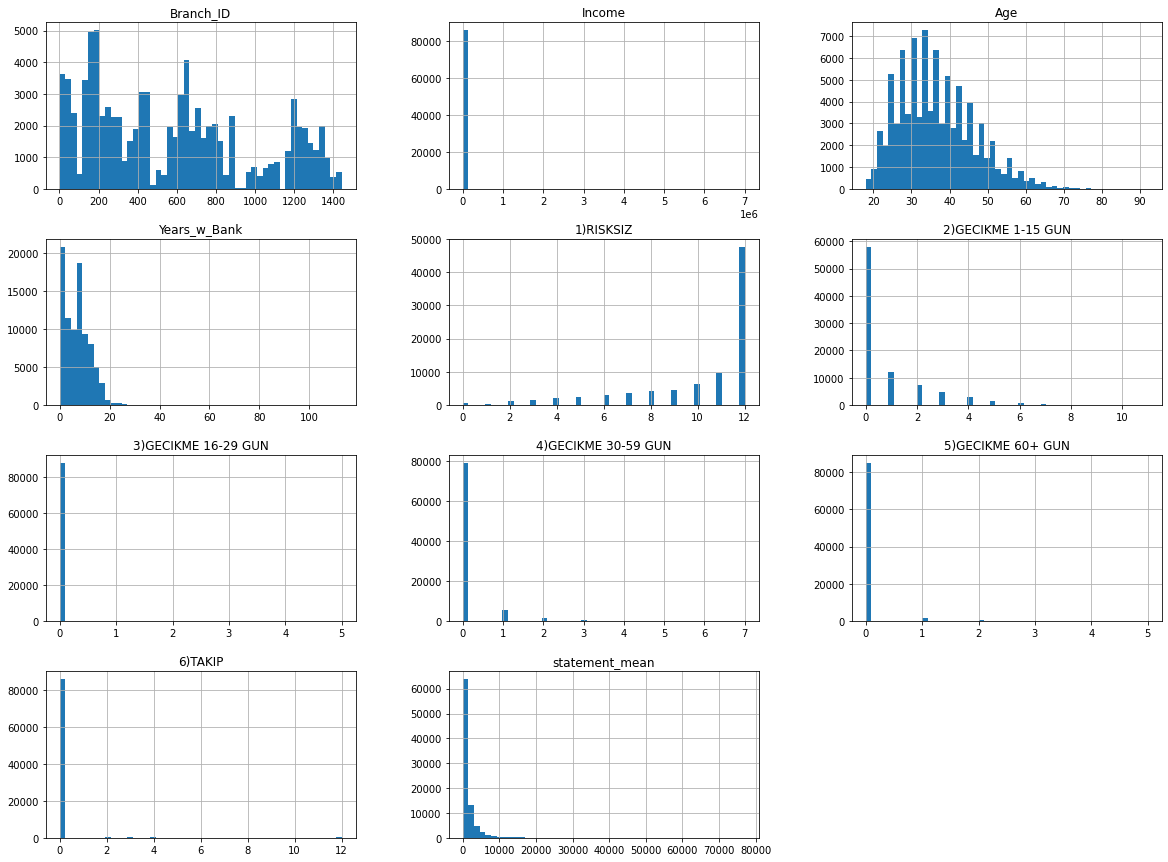

In [111]:
# Data Exploration
%matplotlib inline
import matplotlib.pyplot as plt
demo_df.iloc[:,0:19].hist(bins=50, figsize=(20,15))
plt.show()

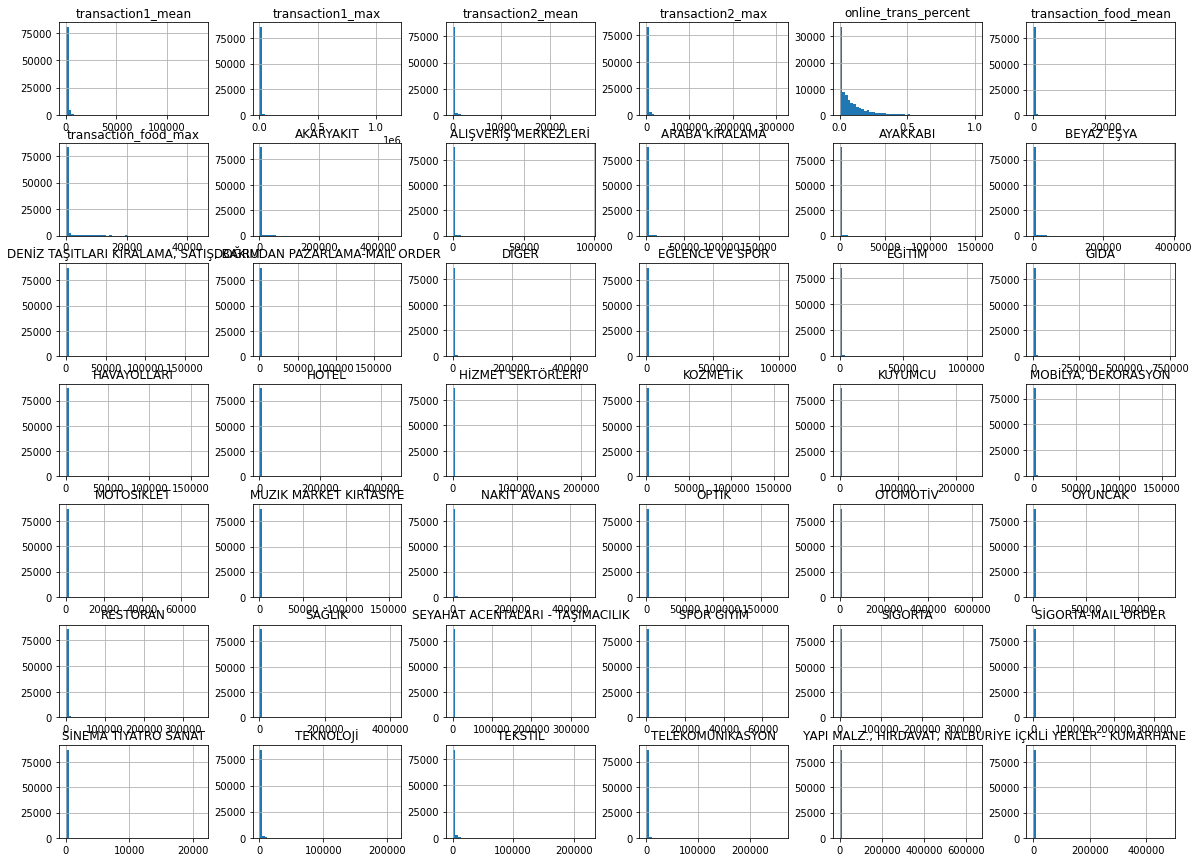

In [112]:
demo_df.iloc[:,20:].hist(bins=50, figsize=(20,15))
plt.show()

In [113]:
demo_df.columns.values

array(['Cust_Segment', 'Branch_ID', 'Gender', 'Marital_Status',
       'Education_Lv', 'Job_Status', 'Income', 'Age', 'Years_w_Bank',
       'Work_Region', 'Home_Region', 'Branch_Region', '1)RISKSIZ',
       '2)GECIKME 1-15 GUN', '3)GECIKME 16-29 GUN', '4)GECIKME 30-59 GUN',
       '5)GECIKME 60+ GUN', '6)TAKIP', 'statement_mean', 'statement_max',
       'transaction1_mean', 'transaction1_max', 'transaction2_mean',
       'transaction2_max', 'online_trans_percent',
       'transaction_food_mean', 'transaction_food_max', 'AKARYAKIT',
       'ALIŞVERİŞ MERKEZLERİ', 'ARABA KİRALAMA', 'AYAKKABI', 'BEYAZ EŞYA',
       'DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM',
       'DOĞRUDAN PAZARLAMA-MAIL ORDER', 'DİĞER', 'EĞLENCE VE SPOR',
       'EĞİTİM', 'GIDA', 'HAVAYOLLARI', 'HOTEL', 'HİZMET SEKTÖRLERİ',
       'KOZMETİK', 'KUYUMCU', 'MOBİLYA, DEKORASYON', 'MOTOSİKLET',
       'MUZIK MARKET KIRTASİYE', 'NAKİT AVANS', 'OPTİK', 'OTOMOTİV',
       'OYUNCAK', 'RESTORAN', 'SAĞLIK',
       'SEYAHAT ACENTAL

## Data Processing

In [114]:
#train/test split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(demo_df, test_size = 0.2, random_state = 16)

In [115]:
# separate labels from feature matrix
train_y = train_set['Job_Status']
train_X = train_set.drop('Job_Status', axis = 1)
test_y = test_set['Job_Status']
test_X = test_set.drop('Job_Status', axis = 1)

In [116]:
#pipeline

# locations, gender, marital status, education level, job status, penalties
# Additional processing with full data set: drop home region branch region nulls

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler())
])

In [117]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline  = Pipeline([
('cat_encoder', OneHotEncoder())
])

In [118]:
from sklearn.compose import ColumnTransformer
num_attribs = ['Branch_ID', 'Income', 'Age', 'Years_w_Bank', '1)RISKSIZ',
       '2)GECIKME 1-15 GUN', '3)GECIKME 16-29 GUN', '4)GECIKME 30-59 GUN',
       '5)GECIKME 60+ GUN', '6)TAKIP', 'statement_mean', 'statement_max',
       'transaction1_mean', 'transaction1_max', 'transaction2_mean',
       'transaction2_max', 'online_trans_percent',
       'transaction_food_mean', 'transaction_food_max', 'AKARYAKIT',
       'ALIŞVERİŞ MERKEZLERİ', 'ARABA KİRALAMA', 'AYAKKABI', 'BEYAZ EŞYA',
       'DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM',
       'DOĞRUDAN PAZARLAMA-MAIL ORDER', 'DİĞER', 'EĞLENCE VE SPOR',
       'EĞİTİM', 'GIDA', 'HAVAYOLLARI', 'HOTEL', 'HİZMET SEKTÖRLERİ',
       'KOZMETİK', 'KUYUMCU', 'MOBİLYA, DEKORASYON', 'MOTOSİKLET',
       'MUZIK MARKET KIRTASİYE', 'NAKİT AVANS', 'OPTİK', 'OTOMOTİV',
       'OYUNCAK', 'RESTORAN', 'SAĞLIK',
       'SEYAHAT ACENTALARI - TAŞIMACILIK', 'SPOR GİYİM', 'SİGORTA',
       'SİGORTA-MAIL ORDER', 'SİNEMA TİYATRO SANAT', 'TEKNOLOJİ',
       'TEKSTİL', 'TELEKOMÜNİKASYON', 'YAPI MALZ., HIRDAVAT, NALBURİYE',
       'İÇKİLİ YERLER - KUMARHANE']
cat_attribs = ['Cust_Segment', 'Gender', 'Marital_Status', 'Education_Lv', 'Work_Region', 'Home_Region', 'Branch_Region']

full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs), 
], remainder = 'passthrough')

In [119]:
train_X_prepared = full_pipeline.fit_transform(train_X)

In [120]:
# train_y = (train_y == 'EVLİ')
# test_y_md = (test_y == 'EVLİ')

In [121]:
test_y.value_counts()

PRIVATE       15484
PUBLIC         1212
UNEMPLOYED      842
Name: Job_Status, dtype: int64

## Dimensionality Reduction

In [122]:
#pca
from sklearn.decomposition import TruncatedSVD

TruncSVD = TruncatedSVD(n_components = 90)
TruncSVD.fit(train_X_prepared)
cumsum = np.cumsum(TruncSVD.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1

In [123]:
d

44

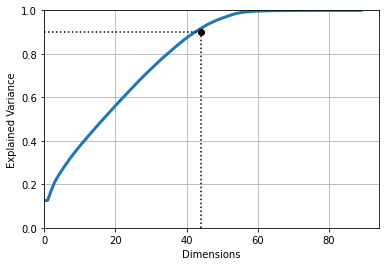

In [124]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 94, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.90], "k:")
plt.plot([0, d], [0.90, 0.90], "k:")
plt.plot(d, 0.90, "ko")

plt.grid(True)
# save_fig("explained_variance_plot")
plt.show()

# try 8 dimensions

In [125]:
TruncSVD = TruncatedSVD(n_components=44)
X_reduced = TruncSVD.fit_transform(train_X_prepared)

## Train Model

## Bagging Classifier

In [126]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth=9, max_features=8), n_estimators=141,
    max_samples=100, bootstrap=True, n_jobs=-1,
    oob_score=True)

bag_clf.fit(X_reduced, train_y)

bag_clf.oob_score_

0.8782876448702048

In [127]:
y_train_pred = bag_clf.predict(X_reduced)

In [128]:
from sklearn.metrics import accuracy_score

accuracy_score(train_y, y_train_pred)

0.8782876448702048

In [129]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y, y_train_pred)

array([[61611,     0,     1],
       [ 5106,     0,     0],
       [ 3431,     0,     0]])

In [130]:
feature_importances = np.mean([tree.feature_importances_ for tree in bag_clf.estimators_], axis=0)
sorted(zip(feature_importances, demo_df), reverse=True)[0:10]

[(0.04112893434753786, 'Branch_ID'),
 (0.037588120536329477, 'Age'),
 (0.034445227737736686, 'Work_Region'),
 (0.03232806595433095, 'Job_Status'),
 (0.03089496760965191, 'Gender'),
 (0.030567400106169998, 'Marital_Status'),
 (0.029769747098922272, 'Education_Lv'),
 (0.029227617935485506, 'Years_w_Bank'),
 (0.0278570466485962, 'HOTEL'),
 (0.02769655648690428, 'AYAKKABI')]

## AdaBoost

In [131]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1, max_features=6), n_estimators=384,
algorithm="SAMME.R", learning_rate=0.5)

ada_clf.fit(X_reduced, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_features=6),
                   learning_rate=0.5, n_estimators=384)

In [132]:
from sklearn.model_selection import cross_val_predict

y_train_pred = ada_clf.predict(X_reduced)

In [133]:
confusion_matrix(train_y, y_train_pred)

array([[61268,    64,   280],
       [ 4941,    47,   118],
       [ 3060,    22,   349]])

In [134]:
from sklearn.metrics import accuracy_score

accuracy_score(train_y, y_train_pred)

0.8790431795178834

In [135]:
feature_importances = np.mean([tree.feature_importances_ for tree in ada_clf.estimators_], axis=0)
sorted(zip(feature_importances, demo_df), reverse=True)[0:10]

[(0.08333333333333333, 'Cust_Segment'),
 (0.08333333333333333, 'Branch_ID'),
 (0.033854166666666664, 'Years_w_Bank'),
 (0.03125, 'Gender'),
 (0.028645833333333332, 'KUYUMCU'),
 (0.028645833333333332, 'Education_Lv'),
 (0.026041666666666668, 'transaction1_mean'),
 (0.026041666666666668, 'transaction1_max'),
 (0.026041666666666668, 'statement_max'),
 (0.026041666666666668, 'Income')]

## Gradient Boost

In [136]:
from sklearn.ensemble import GradientBoostingClassifier

In [137]:
gbrt = GradientBoostingClassifier(max_depth=3, max_features=5, n_estimators=306, learning_rate=0.2)
gbrt.fit(X_reduced, train_y)

GradientBoostingClassifier(learning_rate=0.2, max_features=5, n_estimators=306)

In [138]:
from sklearn.model_selection import cross_val_predict

y_train_pred = gbrt.predict(X_reduced)

In [139]:
from sklearn.metrics import accuracy_score

accuracy_score(train_y, y_train_pred)

0.8909606694322085

In [140]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_y, y_train_pred)

array([[61344,    54,   214],
       [ 4578,   399,   129],
       [ 2629,    45,   757]])

In [141]:
feature_importances = np.mean([tree.feature_importances_ for tree in bag_clf.estimators_], axis=0)
sorted(zip(feature_importances, demo_df), reverse=True)[0:10]

[(0.04112893434753786, 'Branch_ID'),
 (0.037588120536329477, 'Age'),
 (0.034445227737736686, 'Work_Region'),
 (0.03232806595433095, 'Job_Status'),
 (0.03089496760965191, 'Gender'),
 (0.030567400106169998, 'Marital_Status'),
 (0.029769747098922272, 'Education_Lv'),
 (0.029227617935485506, 'Years_w_Bank'),
 (0.0278570466485962, 'HOTEL'),
 (0.02769655648690428, 'AYAKKABI')]

## Neural Network

In [142]:
# import tensorflow as tf
# from tensorflow import keras

In [143]:
# X_train, X_val, y_train, y_val = train_test_split(X_reduced, train_y)

In [144]:
# input_ = keras.layers.Input(shape=X_reduced.shape[1:])
# hidden1 = keras.layers.Dense(100, activation="relu")(input_)
# hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
# output = keras.layers.Dense(1)(hidden2)
# model = keras.models.Model(inputs=[input_], outputs=[output])
# model.summary()

In [145]:
# model.compile(loss="binary_crossentropy",
# metrics=["accuracy"])


In [146]:
 # history = model.fit(X_train, y_train, epochs=30,
 # validation_data=(X_val, y_val))


# Test data on test sets

## Bagging Test

In [147]:
test_X[test_X['Marital_Status'] == 'EVLİLİĞİN İPTALİ']

,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Income,Age,Years_w_Bank,Work_Region,Home_Region,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE


In [148]:
test_X_prepared = full_pipeline.transform(test_X)
test_X_reduced = TruncSVD.transform(test_X_prepared)

In [149]:
bag_y_pred = bag_clf.predict(test_X_reduced)
accuracy_score(test_y, bag_y_pred)

0.882825863838522

In [150]:
confusion_matrix(test_y, bag_y_pred)

array([[15483,     1,     0],
       [ 1212,     0,     0],
       [  842,     0,     0]])

In [151]:
# from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(test_y_md, bag_y_pred)

# def plot_roc_curve(fpr, tpr, label=None):
#     plt.plot(fpr, tpr, linewidth=2, label=label)
#     plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
#     plt.axis([0, 1, 0, 1])                                    # Not shown in the book
#     plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
#     plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
#     plt.grid(True)                                            # Not shown

# plt.figure(figsize=(8, 6))                                    # Not shown
# plot_roc_curve(fpr, tpr)
# plt.show()

## AdaBoost Test

In [152]:
ada_y_pred = ada_clf.predict(test_X_reduced)
accuracy_score(test_y, ada_y_pred)

0.8823126924392747

In [153]:
confusion_matrix(test_y, ada_y_pred)

array([[15385,    20,    79],
       [ 1179,     9,    24],
       [  753,     9,    80]])

In [154]:
# from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(test_y_md, ada_y_pred)

# def plot_roc_curve(fpr, tpr, label=None):
#     plt.plot(fpr, tpr, linewidth=2, label=label)
#     plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
#     plt.axis([0, 1, 0, 1])                                    # Not shown in the book
#     plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
#     plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
#     plt.grid(True)                                            # Not shown

# plt.figure(figsize=(8, 6))                                    # Not shown
# plot_roc_curve(fpr, tpr)
# plt.show()

## GradientBoost Test

In [155]:
gbrt_y_pred = gbrt.predict(test_X_reduced)
accuracy_score(test_y, gbrt_y_pred)

0.8819705781731099

In [156]:
confusion_matrix(test_y, gbrt_y_pred)

array([[15347,    39,    98],
       [ 1147,    18,    47],
       [  721,    18,   103]])

In [157]:
# from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(test_y_md, gbrt_y_pred)

# def plot_roc_curve(fpr, tpr, label=None):
#     plt.plot(fpr, tpr, linewidth=2, label=label)
#     plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
#     plt.axis([0, 1, 0, 1])                                    # Not shown in the book
#     plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
#     plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
#     plt.grid(True)                                            # Not shown

# plt.figure(figsize=(8, 6))                                    # Not shown
# plot_roc_curve(fpr, tpr)
# plt.show()